### 1. Generate 2D Gaussian distribution

----------------------------------------

In [184]:
import numpy as np 
from math import *
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Image, display, Math, Latex

# this allows plots to appear directly in the notebook
%matplotlib inline
%config IPCompleter.greedy=True

# Params
n_inpoints = 20

# Functions 

#### Class 0

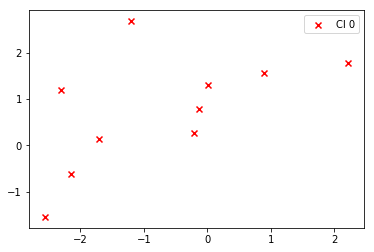

In [185]:
theta0 = 0
lmb01 = 2
lmb02 = 1
m0 = (0,  0)
# computing u * u.T and later multiplying with lambda
cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)], 
         [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))], 
         [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
x0, y0 = np.random.multivariate_normal(m0, cov0, int(n_inpoints/2)).T
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.legend()    
plt.show()

#### Class 1 (Mixture A & B)

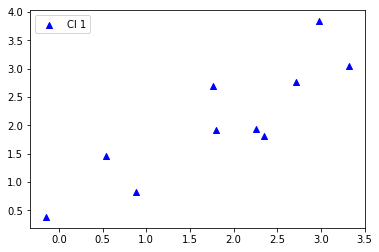

In [186]:
# Mixture A
theta1a = -3*pi/4
lmb1a1 = 2
lmb1a2 = 1/4
m1a = (-2, 1)
cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)], 
         [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))], 
         [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
x1a, y1a = np.random.multivariate_normal(m1a, cov1a, int(n_inpoints/2)).T
#print('Shape: ',x1a.shape,', ',y1a.shape,', ',cov1a)

# Mixture B
theta1b = pi/4
lmb1b1 = 3
lmb1b2 = 1
m1b = (3, 2)
cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)], 
         [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))], 
         [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
x1b, y1b = np.random.multivariate_normal(m1b, cov1b, int(n_inpoints/2)).T
#print('Shape: ',x1b.shape,', ',y1b.shape,', ',cov1b)

# Class 1 (A * 0.33 +B * 0.66)
y1 = np.array(y1a)* (1 / 3)+np.array(y1b)* (2 / 3)
x1 = np.array(x1a)* (1 / 3)+np.array(x1b)* (2 / 3)
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()    
plt.show()

#### Combined plot 

Shape; X: (20,) , Y: (20,)


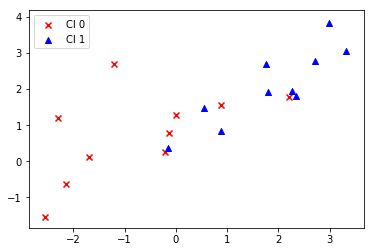

In [187]:
x = np.concatenate((x0, x1))
y = np.concatenate((y0, y1))
print('Shape; X:',x.shape,', Y:',y.shape)
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()    
plt.show()

### 2. MAP 

- Compute log likelihoods as log((pdf y1)/(pdf y0)) > 0 ===> [Class1]
- We can then find the values of µ and σ that maximize the log likelihood by taking derivative
with respect to the desired variable and solving the equation obtained.
- MLE for parameters mean and variance
\begin{equation}
\hat{\mu} = \frac{1}{N} {{\sum}}_{n=1}^{N}x_n
\end{equation}

\begin{equation}
\hat{\sigma}^2 = \frac{1}{N} {{\sum}}_{n=1}^{N}(x_n - \hat{\mu})^2
\end{equation}

[ 0.12774121  1.56595739  0.7804918  -0.61818181 -1.55485709  1.29263478
  1.78000325  1.19754366  0.25496413  2.68635059  0.38173672  2.70134138
  0.83344739  3.04508284  1.94456872  1.91341527  3.84193366  2.7690718
  1.46793746  1.80985656]
1.4110519859471489
[[3.44818576 1.87982446]
 [1.87982446 1.701172  ]]
(2, 2)
{1: -9.625172130838886e-07, 9: -3.823557936203769e-05}
[(9, -3.823557936203769e-05), (1, -9.625172130838886e-07)]
(10,)


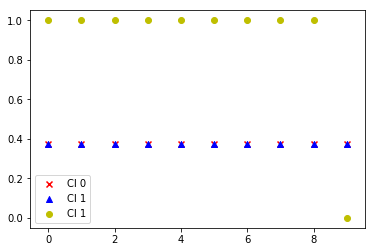

In [194]:
# Estimating the mean vector.
muMle = np.mean(y, axis=0)
print(muMle)
covMle = np.cov(x,y)
print(covMle)
print(covMle.shape)

# Take the log likelihood based on the generated data
y0 = norm.pdf(y0)
y1 = norm.pdf(y1)
y_ll = np.log2( (y1 / y0)) 
z_ll = []

# Obtain intersection
edge_status_prev = 0
idx = 0
edge_index = {}
for xl in y_ll:
    # Compare with 0
    status = -1
    if xl > 0:
        status = 1
    elif xl < 0:
        status = 0
    else:
        status = 0.5
    z_ll.append(status)
    # Skip first
    if idx == 0:
        idx = idx+1
        continue
    # Verify the edge change
    if status != edge_status_prev:
        #print([x, y_ll[idx-1]])
        edge_index[idx] = xl - y_ll[idx-1]
    edge_status_prev = status
    idx = idx+1
print(edge_index)
# Only the magnitude hence comparing square
edge_index = sorted(edge_index.items(), key=lambda x: x[1])
print(edge_index)
freex = np.arange(0, int(n_inpoints/2), 1)
#plt.plot( y_ll, color = 'b',marker='x', label = 'Cl')
#plt.plot( z_ll, color = 'r',marker='o', label = 'Cl')
print(y0.shape)
plt.scatter(freex, y0, color = 'r',marker='x', label = 'Cl 0')
plt.scatter(freex, y1, color = 'b',marker='^', label = 'Cl 1')
plt.scatter(freex, z_ll, color = 'y',marker='o', label = 'Cl 1')
plt.legend() 
plt.show()